In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization, ZeroPadding2D, Add, ReLU, LSTM, Bidirectional, Input
from keras.callbacks import EarlyStopping

In [2]:
data_frame = pd.read_excel('data.xlsx')

In [3]:
data_frame.head(11)
df_preprocess = data_frame.dropna(subset='Unnamed: 0')

In [4]:
df_preprocess = df_preprocess.reset_index(drop=True)
df_preprocess.columns = df_preprocess.iloc[0]
df_preprocess = df_preprocess.drop(0).reset_index(drop=True)
df_preprocess

,STT,Thời điểm đo,NaN,NaN,Điện áp (V),NaN,NaN,Dòng điện (A),NaN,NaN,...,NaN,NaN,Tần số (Hz),NaN,NaN,NaN,I (đm),U (đm),P (đm),Mã trạm
0,1,01/01/22 00:00,01/01/2022 00:01:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,237.234,236.063,237.32,304.2,348.75,334.35,...,NaN,NaN,50.13,50.12,50.12,NaN,811.59,230,560,020343
1,2,01/01/2022 00:30:00,-,Serial: - - -\n- TU: - - TI: - - HSN: -,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-
2,3,01/01/22 01:00,01/01/2022 00:57:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,234.406,233.089,234.427,279.6,297.9,286.05,...,NaN,NaN,50.1,50.1,50.1,NaN,811.59,230,560,020343
3,4,01/01/22 01:30,01/01/2022 01:25:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,235.978,234.657,235.904,260.25,270.3,277.05,...,NaN,NaN,50.02,50.02,50.02,NaN,811.59,230,560,020343
4,5,01/01/22 02:00,01/01/2022 01:54:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,233.935,232.942,234.02,294,279.3,287.85,...,NaN,NaN,49.99,49.99,49.99,NaN,811.59,230,560,020343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26663,26664,20/06/23 13:00,20/06/2023 13:00:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,232.302,232.09,233.033,413.7,455.25,441.45,...,NaN,NaN,49.83,49.83,49.83,NaN,811.59,230,560,020343
26664,26665,20/06/23 13:30,20/06/2023 13:27:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,233.709,233.969,234.602,417,439.5,460.5,...,NaN,NaN,50.03,50.03,50.03,NaN,811.59,230,560,020343
26665,26666,20/06/23 14:00,20/06/2023 13:54:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,234.291,234.486,235.393,411.75,434.1,393.45,...,NaN,NaN,50.08,50.08,50.07,NaN,811.59,230,560,020343
26666,26667,20/06/23 14:30,20/06/2023 14:22:00,Serial: ML31717088282 - ML3 - Meter NURI\n- TU...,235.209,235.167,236.066,407.85,449.55,438.6,...,NaN,NaN,50.04,50.03,50.02,NaN,811.59,230,560,020343


In [5]:
df = df_preprocess.iloc[:, [1, 4]]
df

,Thời điểm đo,Điện áp (V)
0,01/01/22 00:00,237.234
1,01/01/2022 00:30:00,NaN
2,01/01/22 01:00,234.406
3,01/01/22 01:30,235.978
4,01/01/22 02:00,233.935
...,...,...
26663,20/06/23 13:00,232.302
26664,20/06/23 13:30,233.709
26665,20/06/23 14:00,234.291
26666,20/06/23 14:30,235.209


In [6]:
df = df.dropna(subset='Điện áp (V)')
df = df.reset_index(drop=True)
df.shape

(25277, 2)

In [7]:
df['Điện áp (V)'] = df['Điện áp (V)'].astype(float)

In [8]:
df['Thời điểm đo'] = pd.to_datetime(df['Thời điểm đo'], errors='coerce')
df['Year'] = df['Thời điểm đo'].dt.year
df['Month'] = df['Thời điểm đo'].dt.month
df['Day'] = df['Thời điểm đo'].dt.day
df['Hour'] = df['Thời điểm đo'].dt.hour
df['Minute'] = df['Thời điểm đo'].dt.minute

C:\Users\admin\AppData\Local\Temp\ipykernel_31976\2848591815.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Thời điểm đo'] = pd.to_datetime(df['Thời điểm đo'], errors='coerce')


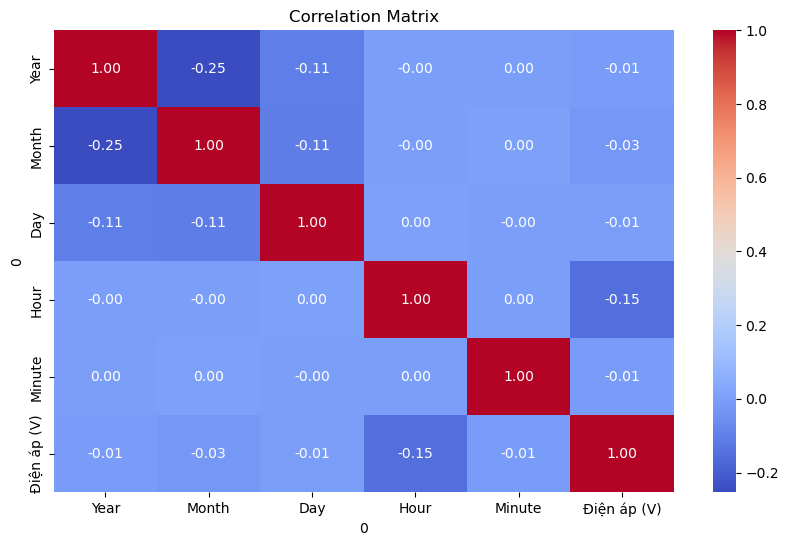

In [9]:
import seaborn as sns

# Select the relevant columns
cols = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Điện áp (V)']
corr_matrix = df[cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
columns_to_normalize = ['Year', 'Month', 'Day', 'Hour', 'Minute']

df['Điện áp (V)'] = minmax_scaler.fit_transform(df[['Điện áp (V)']])
df['Điện áp (V)'] = standard_scaler.fit_transform(df[['Điện áp (V)']])
df[columns_to_normalize] = standard_scaler.fit_transform(df[columns_to_normalize])


In [11]:
X = df[['Year', 'Month', 'Day','Hour', 'Minute']]
Y = df['Điện áp (V)']
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [14]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reshape X_train to have the correct input shape for Conv1D
X_train_reshaped = np.expand_dims(X_train, axis=2)
X_valid_reshaped = np.expand_dims(X_valid, axis=2)

# Adjust the model to avoid negative dimension size
model = Sequential()

# Add Conv1D layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))  # Adjusted pooling size
model.add(Dropout(0.3))

# Add Bidirectional LSTM layers
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=1))  # Adjusted pooling size

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=1))  # Adjusted pooling size

model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))

# Add Fully Connected layers
model.add(Flatten())
model.add(Dense(1))  # Add a Dense layer with a single neuron for regression output

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

history = model.fit(X_train_reshaped, Y_train,
                    batch_size=32,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_valid_reshaped, Y_valid))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 1, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 1, 256)         │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 756,609 (2.89 MB)

 Trainable params: 756,609 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.9945 - val_loss: 0.9856
Epoch 2/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9804 - val_loss: 0.9847
Epoch 3/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9911 - val_loss: 0.9829
Epoch 4/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9881 - val_loss: 0.9778
Epoch 5/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9798 - val_loss: 0.9792
Epoch 6/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9892 - val_loss: 0.9761
Epoch 7/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9820 - val_loss: 0.9818
Epoch 8/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9789 - val_loss: 0.9818
Epoch 9/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9929 - val_loss: 0.9738
Epoch 10/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9777 - val_loss: 0.9723
Epoch 11/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9920 - val_loss: 0.9723
Epoch 12/30
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [15]:
model.save('model.h5')

In [16]:
model = keras.models.load_model('model.h5')
y_pred = model.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(f'R² Score: {r2*0.1}')


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² Score: 0.0022868605549582035


In [19]:
def residual_block(x, filters, kernel_size=3, strides=1):
    shortcut = Conv1D(filters, kernel_size=1, strides=strides, padding='same')(x)
    x = Conv1D(filters, kernel_size, strides=strides, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)
    return x

# Define the model
input_shape = (X_train.shape[1], 1)
inputs = Input(shape=input_shape)

# Initial Conv1D layer
x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(inputs)
x = Dropout(0.3)(x)

# Modified Residual blocks
x = residual_block(x, filters=128, kernel_size=3, strides=2)
x = residual_block(x, filters=128, kernel_size=3, strides=2)

# Additional Conv1D layers
x = Conv1D(filters=128, kernel_size=1, activation='relu')(x)  # Adjusted kernel size to 1
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

# Bidirectional LSTM layers
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(0.3)(x)
x = MaxPooling1D(pool_size=1)(x)  # Adjusted pooling size

x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(0.3)(x)
x = MaxPooling1D(pool_size=1)(x)  # Adjusted pooling size

x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Dropout(0.3)(x)
x = MaxPooling1D(pool_size=1)(x)  # Adjusted pooling size

x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Dropout(0.3)(x)

# Fully Connected layers
x = Flatten()(x)
outputs = Dense(1)(x)  # Add a Dense layer with a single neuron for regression output

# Create the model
model1 = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Print the model summary
model1.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model1.fit(X_train_reshaped, Y_train,
                    batch_size=128,
                    epochs=45,
                    verbose=1,
                    validation_data=(X_valid_reshaped, Y_valid),
                    callbacks=[early_stopping])

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 5, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 5, 128)    │        512 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 5, 128)    │          0 │ conv1d_12[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 3, 128)    │     49,280 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 128)    │        512 │ conv1d_14[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 3, 128)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 3, 128)    │     49,280 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 128)    │        512 │ conv1d_15[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 3, 128)    │     16,512 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 3, 128)    │          0 │ batch_normalizat… │
│                     │                   │            │ conv1d_13[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 3, 128)    │          0 │ add_2[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 2, 128)    │     49,280 │ activation_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2, 128)    │        512 │ conv1d_17[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 2, 128)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 2, 128)    │     49,280 │ activation_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2, 128)    │        512 │ conv1d_18[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 2, 128)    │     16,512 │ activation_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 2, 128)    │          0 │ batch_normalizat… │
│                     │                   │            │ conv1d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 2, 128)    │          0 │ add_3[0][0]       │
│ (Activation)        │                   │            │                 

 Total params: 3,663,489 (13.98 MB)

 Trainable params: 3,662,465 (13.97 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 1.0113 - val_loss: 1.0016
Epoch 2/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.9547 - val_loss: 1.0253
Epoch 3/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.9514 - val_loss: 1.0453
Epoch 4/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.9582 - val_loss: 1.0013
Epoch 5/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.9587 - val_loss: 0.9675
Epoch 6/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.9477 - val_loss: 0.9448
Epoch 7/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.9451 - val_loss: 0.9319
Epoch 8/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.9267 - val_loss: 0.9289
Epoch 9/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.9442 - val_loss: 0.9302
Epoch 10/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.9294 - val_loss: 0.9230
Epoch 11/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.9364 - val_loss: 0.9192
Epoch 12/25
119/119 ━━━━━━━━━━━━━━━━━━━━

In [20]:
model1.save('model1.h5')

In [21]:
model1 = keras.models.load_model('model1.h5')
y_pred = model1.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(f'R² Score: {r2}')


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
R² Score: 0.08019141440518973


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25277 entries, 0 to 25276
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Thời điểm đo  25277 non-null  datetime64[ns]
 1   Điện áp (V)   25277 non-null  float64       
 2   Year          25277 non-null  float64       
 3   Month         25277 non-null  float64       
 4   Day           25277 non-null  float64       
 5   Hour          25277 non-null  float64       
 6   Minute        25277 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB
